In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
Pkl_Filename = 'raw_data_recording-8ch.pkl'
data = []
with open(Pkl_Filename, 'rb') as file:
    data = pickle.load(file)
    
print(data)

[array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        8.60000000e+01, 8.70000000e+01, 8.80000000e+01],
       [0.00000000e+00, 2.02571848e+04, 2.02551508e+04, ...,
        2.14958515e+04, 2.12548549e+04, 2.04841668e+04],
       [0.00000000e+00, 9.69527032e+04, 9.67566784e+04, ...,
        9.55015833e+04, 9.58104173e+04, 9.66560732e+04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61473081e+09, 1.61473081e+09, 1.61473081e+09, ...,
        1.61473081e+09, 1.61473081e+09, 1.61473081e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[8.90000000e+01, 9.00000000e+01, 9.10000000e+01, ...,
        4.10000000e+01, 4.20000000e+01, 4.30000000e+01],
       [2.03097785e+04, 2.13675748e+04, 2.13824834e+04, ...,
        2.10941683e+04, 2.15628620e+04, 2.16045927e+04],
       [9.66848399e+04, 9.56283400e+04, 9

In [169]:
sequenced_data = []
for chunck in data:
    if len(sequenced_data) == 0:
        sequenced_data = chunck
    else:
        sequenced_data = np.concatenate((sequenced_data, chunck), axis=1)
        
print(sequenced_data)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.20000000e+01
  4.30000000e+01 4.40000000e+01]
 [0.00000000e+00 2.02571848e+04 2.02551508e+04 ... 2.31889514e+04
  2.32000602e+04 2.28797821e+04]
 [0.00000000e+00 9.69527032e+04 9.67566784e+04 ... 9.38584842e+04
  9.38978009e+04 9.38610546e+04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.61473081e+09 1.61473081e+09 1.61473081e+09 ... 1.61473095e+09
  1.61473095e+09 1.61473095e+09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [170]:
sequenced_data[22,0:5]

array([1.61473081e+09, 1.61473081e+09, 1.61473081e+09, 1.61473081e+09,
       1.61473081e+09])

In [171]:
sorted_data = sequenced_data[:,sequenced_data[22].argsort()]
sorted_data[22] = sorted_data[22] - min(sorted_data[22])
print(sorted_data[23])

[0. 0. 0. ... 0. 0. 0.]


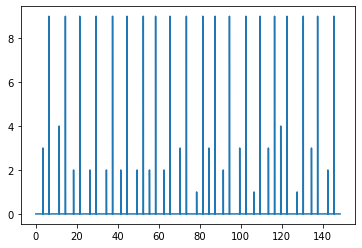

In [172]:
# Events
plt.plot(sorted_data[22], sorted_data[23]) 

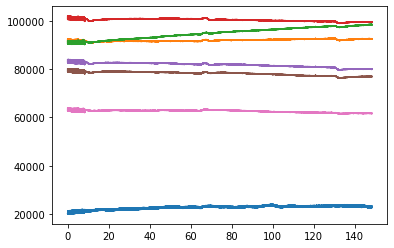

In [177]:
# Events
plt.plot(sorted_data[22][1:], sorted_data[1][1:])
plt.plot(sorted_data[22][1:], sorted_data[3][1:]) 
plt.plot(sorted_data[22][1:], sorted_data[4][1:]) 
plt.plot(sorted_data[22][1:], sorted_data[5][1:]) 
plt.plot(sorted_data[22][1:], sorted_data[6][1:]) 
plt.plot(sorted_data[22][1:], sorted_data[7][1:]) 
plt.plot(sorted_data[22][1:], sorted_data[8][1:]) 

In [178]:
event_times = []
for i in range(sorted_data.shape[1]):
    event = sorted_data[23][i]
    e_time = sorted_data[22][i]
    if event != 0:
        event_times.append([event, i])
        
print(event_times)

[[3.0, 857], [9.0, 1609], [4.0, 2860], [9.0, 3611], [2.0, 4613], [9.0, 5364], [2.0, 6615], [9.0, 7368], [2.0, 8620], [9.0, 9372], [2.0, 10373], [9.0, 11122], [2.0, 12375], [9.0, 13125], [2.0, 13878], [9.0, 14628], [2.0, 15631], [9.0, 16382], [3.0, 17634], [9.0, 18385], [1.0, 19638], [9.0, 20389], [3.0, 21141], [9.0, 21892], [2.0, 22894], [9.0, 23645], [3.0, 24898], [9.0, 25649], [1.0, 26651], [9.0, 27402], [3.0, 28403], [9.0, 29154], [4.0, 29906], [9.0, 30655], [1.0, 31909], [9.0, 32660], [3.0, 33661], [9.0, 34411], [2.0, 35663], [9.0, 36413]]


In [179]:
def get_window(data,ch,a,b):
    return data[ch][a:b]

In [180]:
def get_event_data(label, ch_num):
    all_of_event = []
    for i, event_start in enumerate(event_times):
        if event_start[0] == label:
            event_end = event_times[i+1]
            start = event_start[1] - 250
            stop = event_end[1]
            ev_ch_data = sorted_data[ch_num][start:stop].copy()
            ev_time_data = sorted_data[22][start:stop] - sorted_data[22][start]
            all_of_event.append([ev_ch_data, ev_time_data])
            
    return all_of_event

def event_compare_plot(list_events_data):
    for event in list_events_data:
        plt.plot(event[1],event[0])
        

In [31]:
# from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes

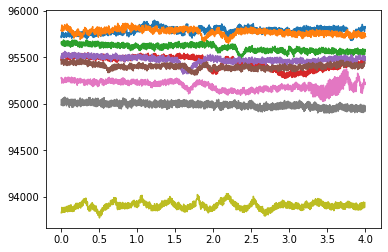

In [189]:
event_3_5 = get_event_data(2, 2)
event_compare_plot(event_3_5)

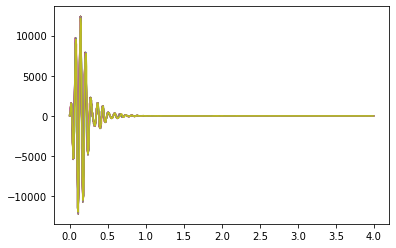

In [190]:
for ind_event in event_3_5:
    ch_data = ind_event[0]
    DataFilter.perform_bandpass(ch_data, 250, 15.5, 5, 3, FilterTypes.BUTTERWORTH, 1.0)

event_compare_plot(event_3_5)

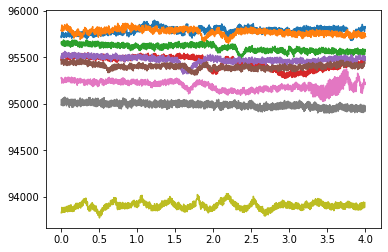

In [191]:
event_3_5 = get_event_data(2, 2)
event_compare_plot(event_3_5)

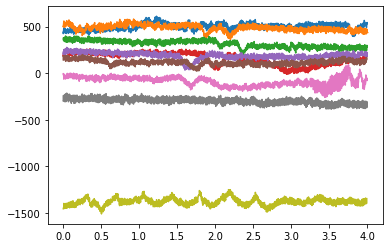

In [192]:

def subtract_mean(eeg_data, separate_ch=True):
    data_sum = 0
    n = 0
    for ch in eeg_data:
        data_sum += sum(ch[0])
        n += len(ch[0])
        
        if separate_ch:
            sub_mean = np.mean(e[0])
            ch[0] = ch[0] - sub_mean

    if not separate_ch:
        mean = data_sum / n

        for ch in eeg_data:
            ch[0] = ch[0] - mean
    

subtract_mean(event_3_5, separate_ch=False)
event_compare_plot(event_3_5)

In [74]:
from neurodsp import filt

In [193]:
f_range = (0.5,50)

def filter_eeg(data):
    sig_filt = filt.filter_signal(data,250, 'bandpass', f_range, filter_type='iir', butterworth_order=2)
    test_filt = filt.filter_signal(sig_filt, 250, 'bandstop', (58,62), n_seconds=1)
    num_nans = sum(np.isnan(test_filt))
    sig_filt = np.concatenate(([0]*(num_nans//2), sig_filt, [0]*(num_nans//2)))
    sig_filt = filt.filter_signal(sig_filt, 250, 'bandstop', (58, 62), n_seconds=1)
    sig_filt = sig_filt[~np.isnan(sig_filt)]

    return sig_filt
    

/Users/colinwageman/opt/anaconda3/lib/python3.8/site-packages/neurodsp/filt/filter.py:96: UserWarning: Edge artifacts are not removed when using an IIR filter.
  warn('Edge artifacts are not removed when using an IIR filter.')
/Users/colinwageman/opt/anaconda3/lib/python3.8/site-packages/neurodsp/filt/utils.py:90: RuntimeWarning: divide by zero encountered in log10
  db = 20 * np.log10(abs(h_vals))


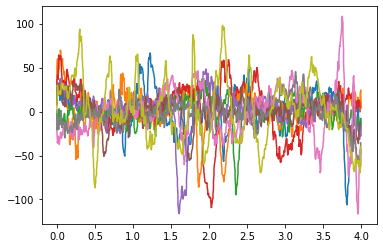

In [194]:
for e in event_3_5:
    e[0] = filter_eeg(e[0])
    
event_compare_plot(event_3_5)

In [195]:
def event_average_plot(list_events_data):
    norm = np.mean(list_events_data[:][0], axis=0)
    plt.plot(list_events_data[0][1],norm)


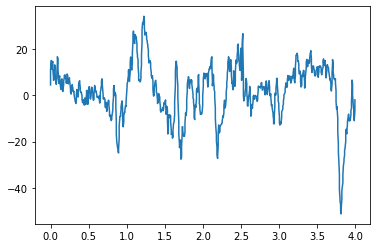

In [196]:
event_average_plot(event_3_5)

In [126]:
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from neurodsp.plts.spectral import plot_power_spectra

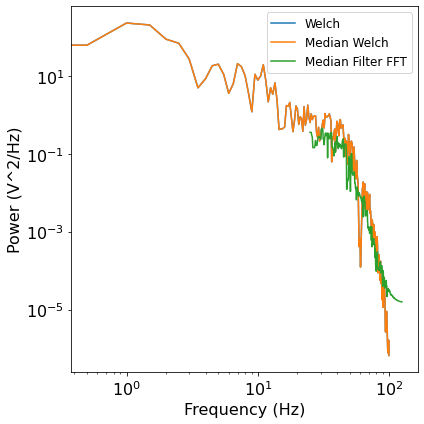

In [197]:
sig_data = event_3_5[0][0]
fs = 250

# Mean of spectrogram (Welch)
freq_mean, psd_mean = compute_spectrum(sig_data, fs, method='welch', avg_type='mean', nperseg=fs*2)

# Median of spectrogram ("median Welch")
freq_med, psd_med = compute_spectrum(sig_data, fs, method='welch', avg_type='median', nperseg=fs*2)

# Median filtered spectrum
freq_mf, psd_mf = compute_spectrum(sig_data, fs, method='medfilt')

plot_power_spectra([freq_mean[:200], freq_med[:200], freq_mf[100:10000]],
                   [psd_mean[:200], psd_med[:200], psd_mf[100:10000]],
                   ['Welch', 'Median Welch', 'Median Filter FFT'])

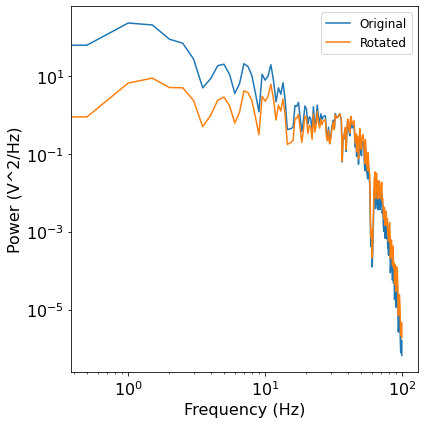

In [198]:
psd_rot = rotate_powerlaw(freq_med, psd_med, delta_exponent=-1, f_rotation=35)

plot_power_spectra([freq_med[:200], freq_med[:200]],
                   [psd_med[:200], psd_rot[:200]],
                   ['Original', 'Rotated'])

In [137]:
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [ ]:
# def normalize(eeg_data):
    

In [207]:
event_1_2 = get_event_data(2, 2)
event_1_3 = get_event_data(2, 3)
event_1_4 = get_event_data(2, 4)
event_1_5 = get_event_data(2, 5)
event_1_6 = get_event_data(2, 6)
event_1_7 = get_event_data(2, 7)
event_1_8 = get_event_data(2, 8)

for e in event_1_2:
    e[0] = filter_eeg(e[0])
for e in event_1_3:
    e[0] = filter_eeg(e[0])
for e in event_1_4:
    e[0] = filter_eeg(e[0])
for e in event_1_5:
    e[0] = filter_eeg(e[0])
for e in event_1_6:
    e[0] = filter_eeg(e[0])
for e in event_1_7:
    e[0] = filter_eeg(e[0])
for e in event_1_8:
    e[0] = filter_eeg(e[0])
    
ev_1_all_ch = np.array([event_1_2[1][0],
                            event_1_3[1][0],
                            event_1_4[1][0],
                            event_1_5[1][0],
                            event_1_6[1][0],
                            event_1_7[1][0],
                            event_1_8[1][0]]).T
print(ev_1_all_ch.shape)


np.random.seed(0)  # set seed for reproducible results
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: sawtooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations
# X.shape
ev_1_all_ch.shape

(1003, 7)


(1003, 7)

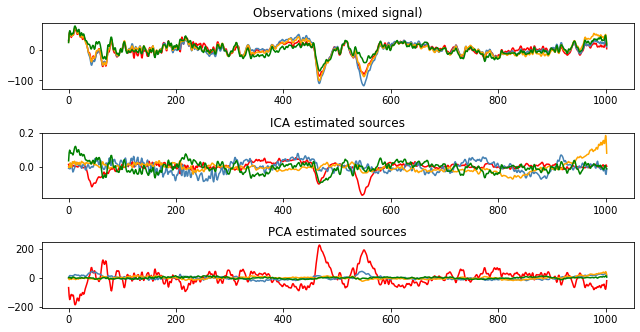

In [208]:
# compute ICA
ica = FastICA(n_components=4)
S_ = ica.fit_transform(ev_1_all_ch)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

# compute PCA
pca = PCA(n_components=4)
H = pca.fit_transform(ev_1_all_ch)  # estimate PCA sources

plt.figure(figsize=(9, 6))

models = [ev_1_all_ch, S_, H]
names = ['Observations (mixed signal)',
         'ICA estimated sources',
         'PCA estimated sources']
colors = ['red', 'steelblue', 'orange', 'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

/Users/colinwageman/opt/anaconda3/lib/python3.8/site-packages/neurodsp/filt/filter.py:96: UserWarning: Edge artifacts are not removed when using an IIR filter.
  warn('Edge artifacts are not removed when using an IIR filter.')
/Users/colinwageman/opt/anaconda3/lib/python3.8/site-packages/neurodsp/filt/utils.py:90: RuntimeWarning: divide by zero encountered in log10
  db = 20 * np.log10(abs(h_vals))


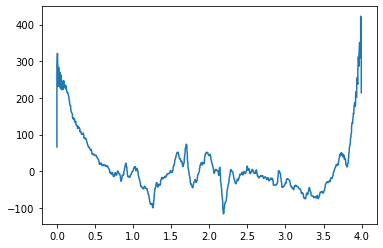

In [201]:
event_1_eye = get_event_data(2, 1)

for e in event_1_eye:
    e[0] = filter_eeg(e[0])
    
plt.plot(event_1_eye[0][1], event_1_eye[0][0])